In [9]:
# Importing all the necessary libraries 

import pandas as pd  # Pandas is used for data manipulation and analysis. 
import numpy as np   # NumPy is fundamental for numerical computing. 
import seaborn as sns   # Seaborn is a statistical data visualization library based on matplotlib. 
import matplotlib.pyplot as plt   # Matplotlib is a comprehensive plotting library for creating a wide range of static, interactive, and animated visualizations in Python. 
import warnings

# Ignore warnings in the notebook
warnings.filterwarnings('ignore')

In [10]:
# To view the first few rows of the dataset
Save_As_You_Spend_df = pd.read_csv('Save as You Spend_ Using Machine Learning to Improve Savings Culture 2 1 (1).csv')
Save_As_You_Spend_df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Question 14: What is your approximate annual i...,Question 15: Approximately what percentage of ...,Question 16: Do you understand the concept of ...,Question 17: How would you rate your level of ...,Question 18: Have you received any formal fina...,Question 19: How important do you consider fin...,Question 20: Have you heard of any Apps for ma...,Question 21: Do you use any mobile or web-base...,"Question 22: If yes, please specify the applic...",Question 23: What features do you find most va...
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Lon...","{""ImportId"":""endDate"",""timeZone"":""Europe/London""}","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}",...,"{""ImportId"":""QID16""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID22""}","{""ImportId"":""QID23""}","{""ImportId"":""QID24_TEXT""}","{""ImportId"":""QID25""}"
2,2024-03-03 17:35:34,2024-03-03 17:37:33,Survey Preview,100,118,True,2024-03-03 17:37:35,R_2PQX2uBZjQXbetH,preview,EN-GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-03 18:51:17,2024-03-03 18:51:53,Survey Preview,100,36,True,2024-03-03 18:51:54,R_6YeMgXVR2MF0y9X,preview,EN-GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
4,2024-03-03 22:21:26,2024-03-03 22:26:41,Survey Preview,100,315,True,2024-03-03 22:26:43,R_6a8P22pxj3BDhOF,preview,EN-GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Emma,NaN


In [11]:
# Print the content of row 0
print(Save_As_You_Spend_df.iloc[0])

StartDate                                                       Start Date
EndDate                                                           End Date
Status                                                       Response Type
Progress                                                          Progress
Duration (in seconds)                                Duration (in seconds)
Finished                                                          Finished
RecordedDate                                                 Recorded Date
ResponseId                                                     Response ID
DistributionChannel                                   Distribution Channel
UserLanguage                                                 User Language
Q2                                           Question 1: What is your age?
Q3                                        Question 2: What is your gender?
Q4                        Question 3: What is your educational background?
Q5                       

In [12]:
# To view the columns
Save_As_You_Spend_df.columns

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'Q2', 'Q3', 'Q4', 'Q5', 'Q5_5_TEXT', 'Q7', 'Q8_1', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25'],
      dtype='object')

# Data Cleaning 

In [13]:
# List of columns to remove
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage', 'Q5_5_TEXT']

# Remove the specified columns
Save_As_You_Spend_df.drop(columns=columns_to_remove, inplace=True)


In [14]:
# Remove the first five rows
Save_As_You_Spend_df2 = Save_As_You_Spend_df.drop(index=range(0, 5))

# Reset the index after removing rows
Save_As_You_Spend_df3 = Save_As_You_Spend_df2.reset_index(drop=True)



In [15]:
# Renaming the columns to make sense of the dataset
new_column_names = {
    'Q2': 'Age',
    'Q3': 'Gender',
    'Q4': 'Educational Background',
    'Q5': 'Ethnicity',
    'Q7': 'Marital Status',
    'Q8_1': 'Country of Residence',  
    'Q9': 'Regularly Sets Aside Money',
    'Q10': 'Creates Budget',
    'Q11': 'Currently Investing',
    'Q12': 'App or Tool Usage',
    'Q13': 'Specific App or Tool Used',
    'Q14': 'Savings Frequency',
    'Q15': 'Existing Savings Account',
    'Q16': 'Annual Income',
    'Q17': 'Percentage Saved',
    'Q18': 'Understanding of Financial Concepts',
    'Q19': 'Financial Literacy Rating',
    'Q20': 'Formal Financial Education',
    'Q21': 'Importance of Financial Management',
    'Q22': 'Awareness of Financial Apps',
    'Q23': 'Mobile/Web-Based Finance Usage',
    'Q24': 'Specific Financial Apps Used',
    'Q25': 'Most Valuable App Features'
}

# Rename the columns
Save_As_You_Spend_Newdf = Save_As_You_Spend_df3.rename(columns=new_column_names)


In [16]:
# To view the first few rows of the  new dataset
Save_As_You_Spend_Newdf.head()

,Age,Gender,Educational Background,Ethnicity,Marital Status,Country of Residence,Regularly Sets Aside Money,Creates Budget,Currently Investing,App or Tool Usage,...,Annual Income,Percentage Saved,Understanding of Financial Concepts,Financial Literacy Rating,Formal Financial Education,Importance of Financial Management,Awareness of Financial Apps,Mobile/Web-Based Finance Usage,Specific Financial Apps Used,Most Valuable App Features
0,25-34,Male,Master's degree or higher,"Black, Black British, Caribbean or African",Single,United Kingdom (UK),Yes,No,Yes,Yes,...,"£10,000 - £20,000",11% - 20%,Yes,High,Yes,Very important,NaN,NaN,Emma,Budget tracking
1,25-34,Female,Bachelor's degree,"Black, Black British, Caribbean or African",Single,Nigeria,Yes,Yes,No,Yes,...,"£30,001 - £40,000",11% - 20%,Yes,Moderate,Yes,Very important,NaN,No,NaN,NaN
2,18-24,Male,Master's degree or higher,Other (please specify),Married,United Kingdom (UK),Yes,Yes,Yes,Yes,...,"Over £50,000",11% - 20%,Yes,Moderate,Yes,Moderately important,Yes,Yes,na,Automated savings
3,25-34,Female,Master's degree or higher,"Black, Black British, Caribbean or African",Single,United Kingdom (UK),Yes,Yes,No,No,...,"Less than £10,000",5% - 10%,Yes,Moderate,No,Very important,No,No,NaN,NaN
4,25-34,Male,Bachelor's degree,"Black, Black British, Caribbean or African",Married,United Kingdom (UK),Yes,No,No,No,...,"£10,000 - £20,000",More than 20%,Yes,High,No,Moderately important,Yes,No,NaN,NaN


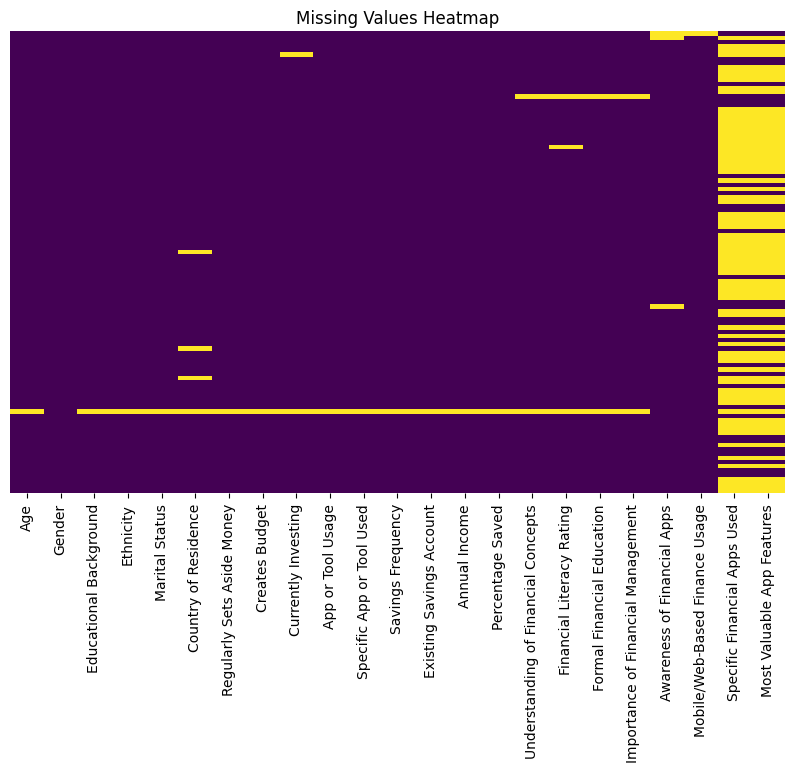

In [17]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(Save_As_You_Spend_Newdf.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [18]:
# Drop columns with a large number of missing values
columns_to_drop = ['Specific Financial Apps Used', 'Most Valuable App Features']
Save_As_You_Spend_Newdf.drop(columns=columns_to_drop, inplace=True)

# Replace missing values in remaining columns with their modes
columns_to_replace = ['Age', 'Gender', 'Educational Background', 'Ethnicity', 'Marital Status', 
                      'Country of Residence', 'Regularly Sets Aside Money', 'Creates Budget', 
                      'Currently Investing', 'App or Tool Usage', 'Specific App or Tool Used', 
                      'Savings Frequency', 'Existing Savings Account', 'Annual Income', 
                      'Percentage Saved', 'Understanding of Financial Concepts', 
                      'Financial Literacy Rating', 'Formal Financial Education', 
                      'Importance of Financial Management', 'Awareness of Financial Apps', 
                      'Mobile/Web-Based Finance Usage']

for col in columns_to_replace:
    Save_As_You_Spend_Newdf[col].fillna(Save_As_You_Spend_Newdf[col].mode()[0], inplace=True)


In [19]:
# To check the cleaned data set
Save_As_You_Spend_Newdf.isna().sum()

Age                                    0
Gender                                 0
Educational Background                 0
Ethnicity                              0
Marital Status                         0
Country of Residence                   0
Regularly Sets Aside Money             0
Creates Budget                         0
Currently Investing                    0
App or Tool Usage                      0
Specific App or Tool Used              0
Savings Frequency                      0
Existing Savings Account               0
Annual Income                          0
Percentage Saved                       0
Understanding of Financial Concepts    0
Financial Literacy Rating              0
Formal Financial Education             0
Importance of Financial Management     0
Awareness of Financial Apps            0
Mobile/Web-Based Finance Usage         0
dtype: int64

In [20]:
gender_counts = Save_As_You_Spend_Newdf['Gender'].value_counts()

# Calculate the percentage of females and males
total_count = gender_counts.sum()
female_percentage = (gender_counts['Female'] / total_count) * 100
male_percentage = (gender_counts['Male'] / total_count) * 100

# Print the percentages
print("Female percentage:", female_percentage)
print("Male percentage:", male_percentage)

Female percentage: 36.36363636363637
Male percentage: 63.63636363636363


In [21]:
marital_counts = Save_As_You_Spend_Newdf['Marital Status'].value_counts()

# Calculate the percentage of females and males
total_count = marital_counts.sum()
Single_percentage = (marital_counts['Single'] / total_count) * 100
Married_percentage = (marital_counts['Married'] / total_count) * 100

# Print the percentages
print("Single percentage:", Single_percentage)
print("Married_percentage:", Married_percentage)

Single percentage: 55.45454545454545
Married_percentage: 43.63636363636363


In [22]:
Save_As_You_Spend_Newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  110 non-null    object
 1   Gender                               110 non-null    object
 2   Educational Background               110 non-null    object
 3   Ethnicity                            110 non-null    object
 4   Marital Status                       110 non-null    object
 5   Country of Residence                 110 non-null    object
 6   Regularly Sets Aside Money           110 non-null    object
 7   Creates Budget                       110 non-null    object
 8   Currently Investing                  110 non-null    object
 9   App or Tool Usage                    110 non-null    object
 10  Specific App or Tool Used            110 non-null    object
 11  Savings Frequency                    110 non-

# EDA ANALYSIS

Research Questions

- How do existing personal finance management apps facilitate automated savings, and what are the adoption rates among different demographic groups?
- What are the variations in savings culture across different demographics, and how do these differences impact overall savings behaviour?
- How can machine learning techniques analyse individual spending patterns and financial goals to recommend personalised savings strategies that align with users' unique circumstances?
- What machine learning models can accurately predict the long-term impact of various saving strategies on individuals' financial health, considering factors such as income fluctuations and life events? (Optional)
- Which machine learning approaches demonstrate effectiveness in identifying opportunities to optimise spending, reduce unnecessary expenses, and redirect funds towards savings goals? (Optional)
- How can intelligent financial management systems, enhanced by machine learning capabilities, incentivise users to adopt better savings habits, foster financial responsibility, and ultimately increase overall savings rates? (Optional)

# Analysis on Question One

How do existing personal finance management apps facilitate automated savings, and what are the adoption rates among different demographic groups?

In [23]:
Save_As_You_Spend_Newdf['Specific App or Tool Used']

0      Yes
1      Yes
2      Yes
3       No
4       No
      ... 
105    Yes
106     No
107     No
108     No
109     No
Name: Specific App or Tool Used, Length: 110, dtype: object

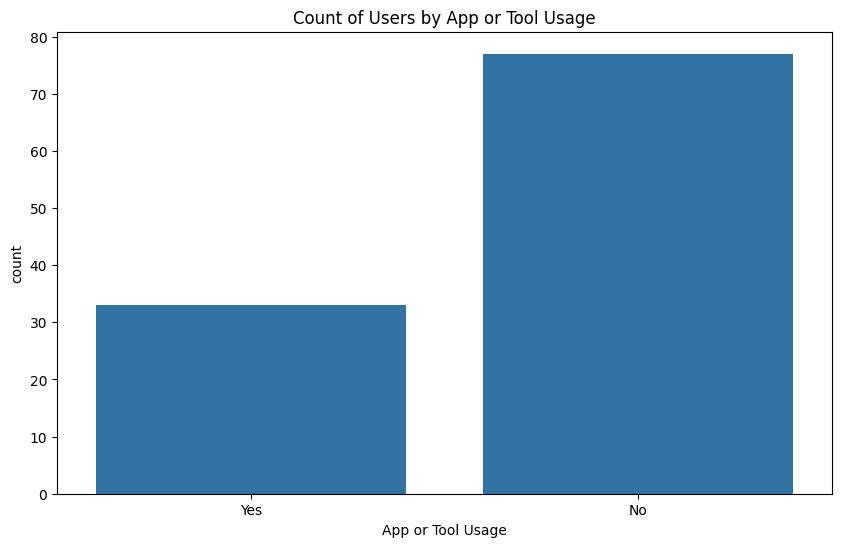

In [24]:
# Let's visualize the adoption rates among different demographic groups with histograms and countplots.

# Plotting App or Tool Usage countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='App or Tool Usage', data=Save_As_You_Spend_Newdf)
plt.title('Count of Users by App or Tool Usage')
plt.show()

In [25]:
User_counts2 = Save_As_You_Spend_Newdf['App or Tool Usage'].value_counts()

total_count2 = User_counts2.sum()
yes_percentage = (User_counts2['Yes'] / total_count) * 100
no_percentage = (User_counts2['No'] / total_count) * 100

# Print the percentages
print("yes:", yes_percentage)
print("no:", no_percentage)

yes: 30.0
no: 70.0


The plot above shows the count of users of personal finance management apps or tools. The majority of the test subjects are not using any apps or tools, which indicates that personal finance management apps are not popular for managing finances and possibly for facilitating automated savings.

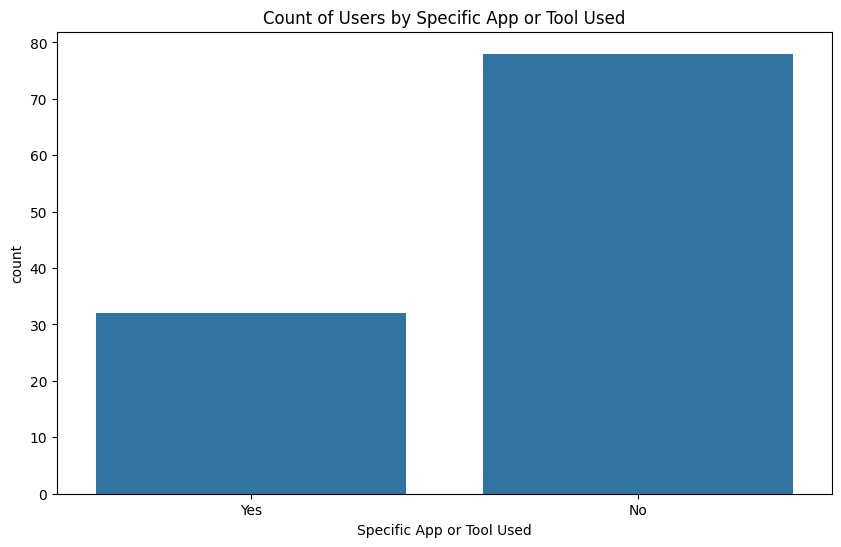

In [26]:
# Plotting Specific App or Tool Used countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Specific App or Tool Used', data=Save_As_You_Spend_Newdf)
plt.title('Count of Users by Specific App or Tool Used')
plt.show()

In [27]:
User_counts3 = Save_As_You_Spend_Newdf['Specific App or Tool Used'].value_counts()

total_count3 = User_counts3.sum()
yes_percentage = (User_counts3['Yes'] / total_count) * 100
no_percentage = (User_counts3['No'] / total_count) * 100

# Print the percentages
print("yes:", yes_percentage)
print("no:", no_percentage)

yes: 29.09090909090909
no: 70.9090909090909


The analysis above shows that the number of users who don't use a "specific app or tool" is higher compared to those who do. This suggests that while there is a general trend towards using finance management apps, there is still a significant portion of the population not committed to any specific one. It might imply an opportunity for app developers to capture this segment of the market or that users may be using multiple tools and not just one specific app.

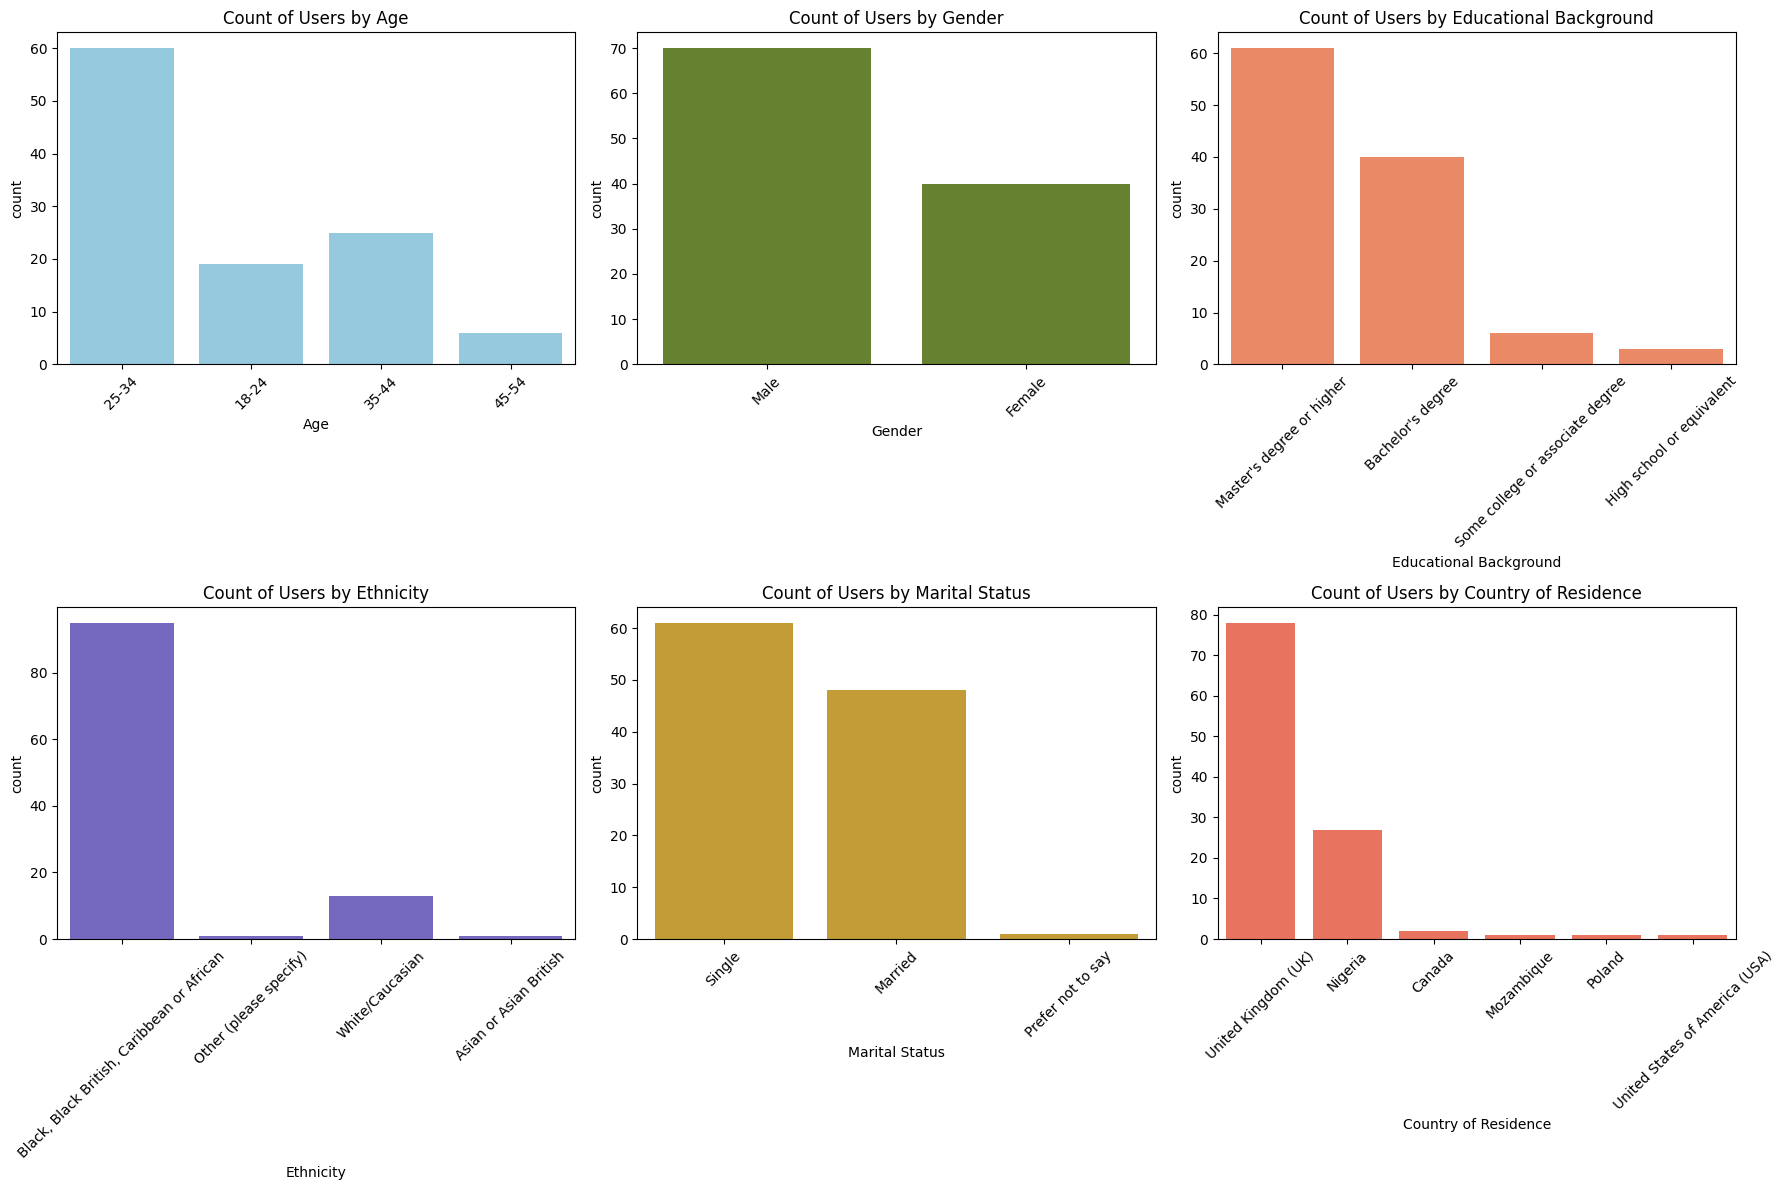

In [28]:
# Plotting demographic distributions
demographic_columns = ['Age', 'Gender', 'Educational Background', 'Ethnicity', 'Marital Status', 'Country of Residence']

colors = ['skyblue', 'olivedrab', 'coral', 'slateblue', 'goldenrod', 'tomato']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.tight_layout(pad=5.0)

for ax, column, color in zip(axes.flatten(), demographic_columns, colors):
    sns.countplot(x=column, data=Save_As_You_Spend_Newdf, ax=ax, palette=[color])
    ax.set_title(f'Count of Users by {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


Demographic Analysis:

The set of plots shows the distribution of users across various demographic categories. The usage of finance management apps varies significantly with age, with the highest adoption among the younger age groups. Gender distribution is more balanced, with a slight lean towards male users. Educational background shows a trend where individuals with higher educational qualifications are more inclined to use these apps. This can suggest that education may play a role in the likelihood of using finance management tools.

In [29]:
# Prepare data for plotting
age_gender_counts = Save_As_You_Spend_Newdf.groupby(['Age', 'Gender']).size().unstack(fill_value=0)
age_gender_app_usage = Save_As_You_Spend_Newdf[Save_As_You_Spend_Newdf['App or Tool Usage'] == 'Yes'].groupby(['Age', 'Gender']).size().unstack(fill_value=0)

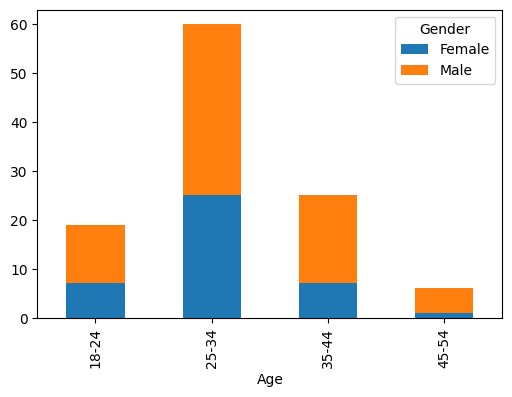

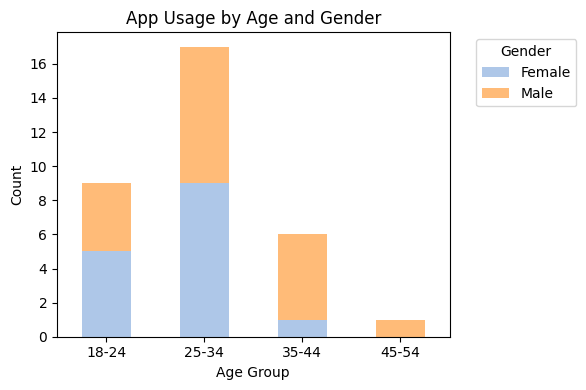

In [30]:
# Plot total counts per age group
age_gender_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(6, 4))

# Plot app usage counts on top, using the same index and columns
age_gender_app_usage.plot(kind='bar', stacked=True, color=['#aec7e8', '#ffbb78'], figsize=(6, 4))

# Beautify the plot
plt.title('App Usage by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This plot combines age and gender demographics and shows the count of app users within those intersections. The highest usage is among younger males (25-34 age group), followed by younger females in the same age group. Usage drops significantly in older age groups for both genders.


CONCLUSION FROM QUESTION ONE

We can conclude that personal finance management apps are more frequently adopted by younger demographics and those with higher educational backgrounds. The usage of these apps seems to have a lower penetration among older age groups. Gender-wise, while both males and females use these apps, younger males seem to be the predominant users. However, this analysis does not detail the types of savings facilitated by these apps, such as automated savings features.

# Analysis on Question Two

What are the variations in savings culture across different demographics, and how do these differences impact overall savings behaviour?

In [31]:
Save_As_You_Spend_Newdf['Gender'].value_counts()

Gender
Male      70
Female    40
Name: count, dtype: int64

In [32]:
# Save_As_You_Spend_Newdf[(Save_As_You_Spend_Newdf['Gender']=='Female')]

In [33]:
Save_As_You_Spend_Newdf.columns

Index(['Age', 'Gender', 'Educational Background', 'Ethnicity',
       'Marital Status', 'Country of Residence', 'Regularly Sets Aside Money',
       'Creates Budget', 'Currently Investing', 'App or Tool Usage',
       'Specific App or Tool Used', 'Savings Frequency',
       'Existing Savings Account', 'Annual Income', 'Percentage Saved',
       'Understanding of Financial Concepts', 'Financial Literacy Rating',
       'Formal Financial Education', 'Importance of Financial Management',
       'Awareness of Financial Apps', 'Mobile/Web-Based Finance Usage'],
      dtype='object')

In [34]:
Save_As_You_Spend_Newdf['Percentage Saved'].unique()

array(['11% - 20%', '5% - 10%', 'More than 20%',
       'I do not save any percentage of my income', 'Less than 5%'],
      dtype=object)

from the percentage saved the columns in categorical column,I will be doing some assumptions to be able to properly do my analysis, below are the assumptions

For the range '11% - 20%', it returns the midpoint, 15.5.

For '5% - 10%', it returns 7.5
.
'More than 20%' is mapped to a representative value of 25, which assumes a value slightly above the range for analytical purposes.
'I do not save any percentage of my income' is given a value of 0, indicating no savings.
'Less than 5%' is assigned a value of 2.5, assuming it represents the midpoint of values between 0% and 5%.

In [35]:
def map_percentage_saved(value):
    if value == '11% - 20%':
        return 15.5  # Midpoint of the range
    elif value == '5% - 10%':
        return 7.5  # Midpoint of the range
    elif value == 'More than 20%':
        return 25  # A value representing more than 20%
    elif value == 'I do not save any percentage of my income':
        return 0  # Representing no savings
    elif value == 'Less than 5%':
        return 2.5  # A value representing less than 5%
    else:
        return None  # In case there are values that don't match any category

# Apply the conversion function to the 'Percentage Saved' column
Save_As_You_Spend_Newdf['Percentage_Saved_Numeric'] = Save_As_You_Spend_Newdf['Percentage Saved'].apply(map_percentage_saved)


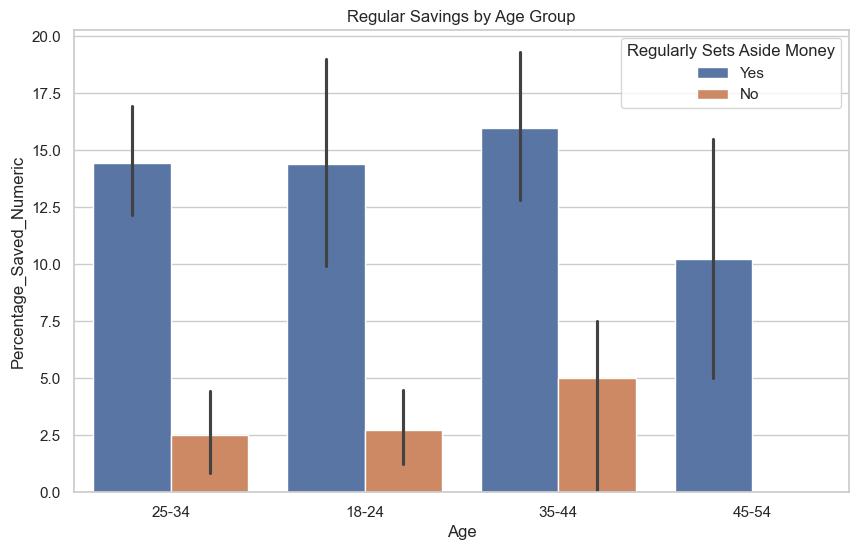

In [36]:
# Convert 'Percentage Saved' from string to numeric for analysis

# Plotting the distribution of 'Percentage_Saved_Numeric' across different demographics
sns.set(style="whitegrid")

# Regularly sets aside money by Age
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Percentage_Saved_Numeric', hue='Regularly Sets Aside Money', data=Save_As_You_Spend_Newdf)
plt.title('Regular Savings by Age Group')
plt.show()

This plot shows the mean 'Percentage Saved' numerically by age group and whether individuals regularly set aside money ('Yes' or 'No'). Error bars indicate the variability within each group. The plot suggests there may be differences in the amount of savings and the regularity of savings behavior across age groups.

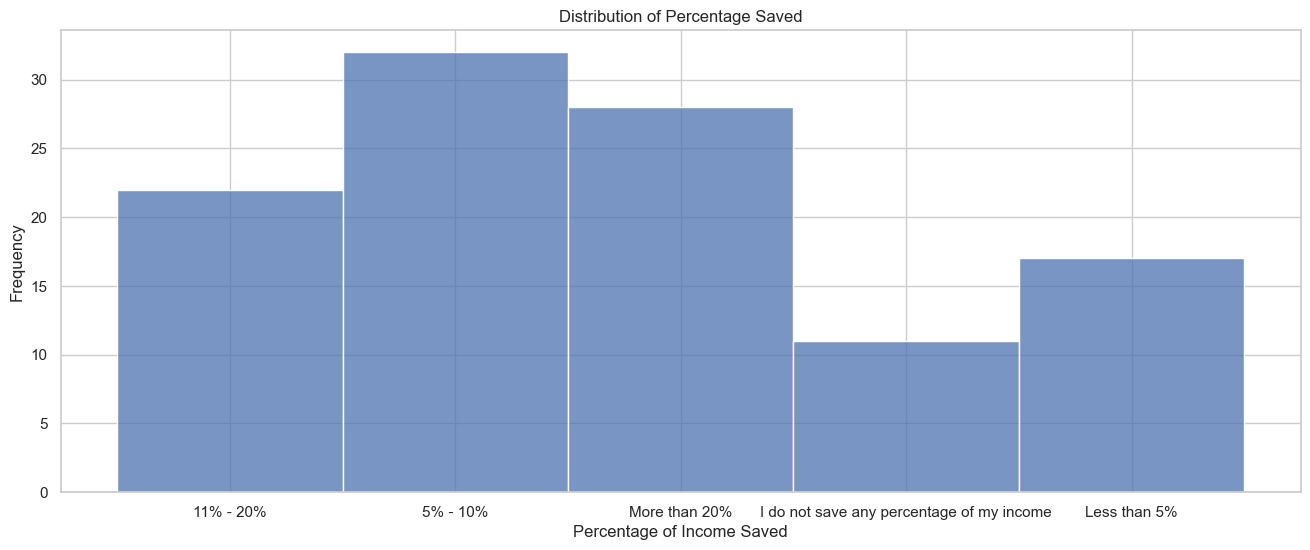

In [37]:
# Histogram of 'Percentage Saved'
plt.figure(figsize=(16, 6))
sns.histplot(Save_As_You_Spend_Newdf['Percentage Saved'], bins=10, kde=False)
plt.title('Distribution of Percentage Saved')
plt.xlabel('Percentage of Income Saved')
plt.ylabel('Frequency')
plt.show()

This histogram displays the frequency of various savings ranges. It indicates the most common savings range is '5% - 10%', followed closely by 'More than 20%'. The histogram also shows a significant number of individuals who save  '11% - 20%' or 'Less than 5%', and a few who do not save at all. This gives a direct look at the distribution of savings percentages among the surveyed individuals.

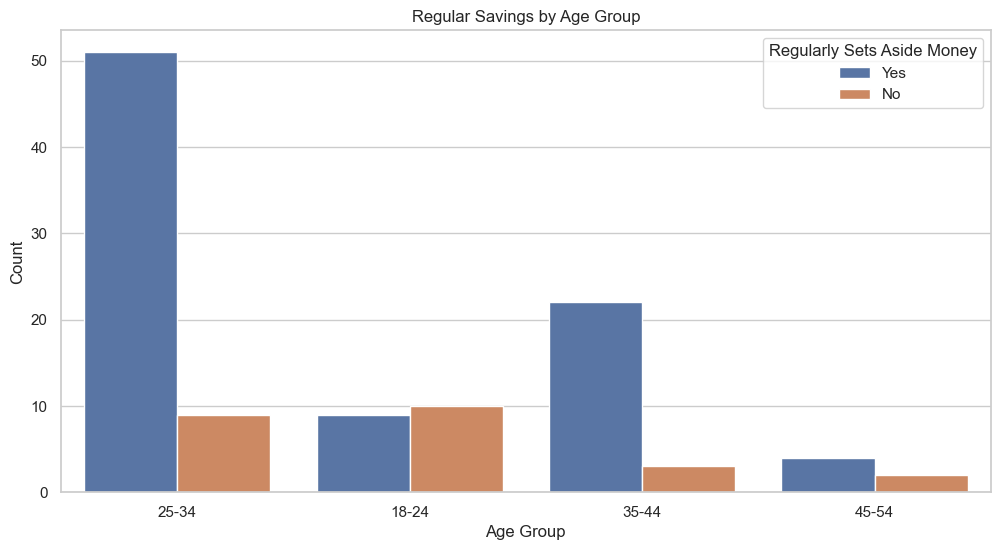

In [38]:
# Bar plot of 'Regularly Sets Aside Money' by 'Age'
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Regularly Sets Aside Money', data=Save_As_You_Spend_Newdf)
plt.title('Regular Savings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Regularly Sets Aside Money')
plt.show()

This count plot illustrates the number of individuals within each age group who either save money regularly or not. The 25-34 age group appears to have the highest count for savings, which may suggest that this age group is the most actively engaged in savings behavior or that it is the largest group within the dataset.

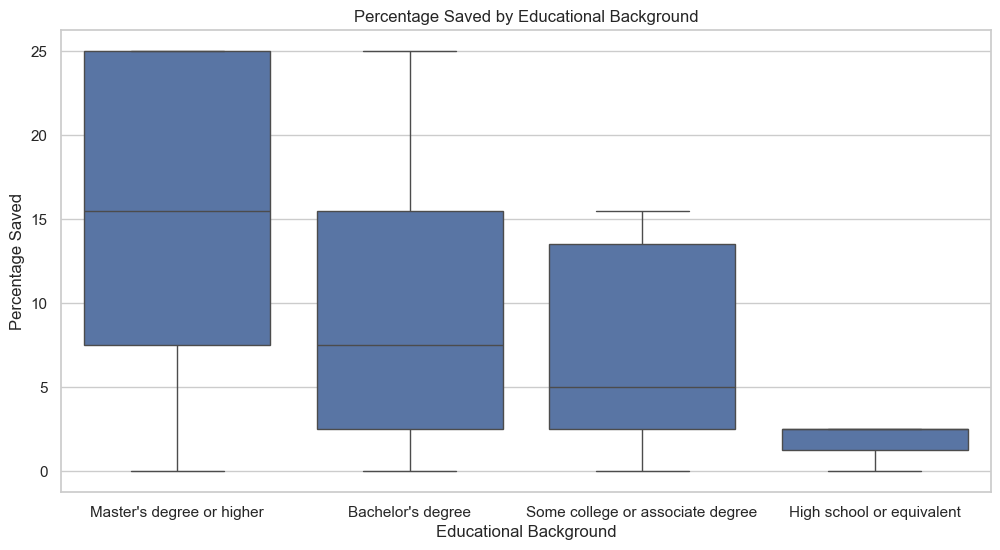

In [39]:
# Box plot of 'Percentage Saved' by 'Educational Background'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Educational Background', y='Percentage_Saved_Numeric', data=Save_As_You_Spend_Newdf)
plt.title('Percentage Saved by Educational Background')
plt.xlabel('Educational Background')
plt.ylabel('Percentage Saved')
plt.show()

This plot shows the spread and median of 'Percentage Saved' among different levels of educational attainment. It indicates that those with 'Master's degree or higher' have a wide spread of savings percentages, with a few outliers saving less than 5%. Individuals with a 'Bachelor's degree' have a tighter savings percentage spread around the median, and those with 'High school or equivalent' appear to save a lower percentage of their income.

This implies that there is a relationship between the level of educational attainment and the percentage of income saved.

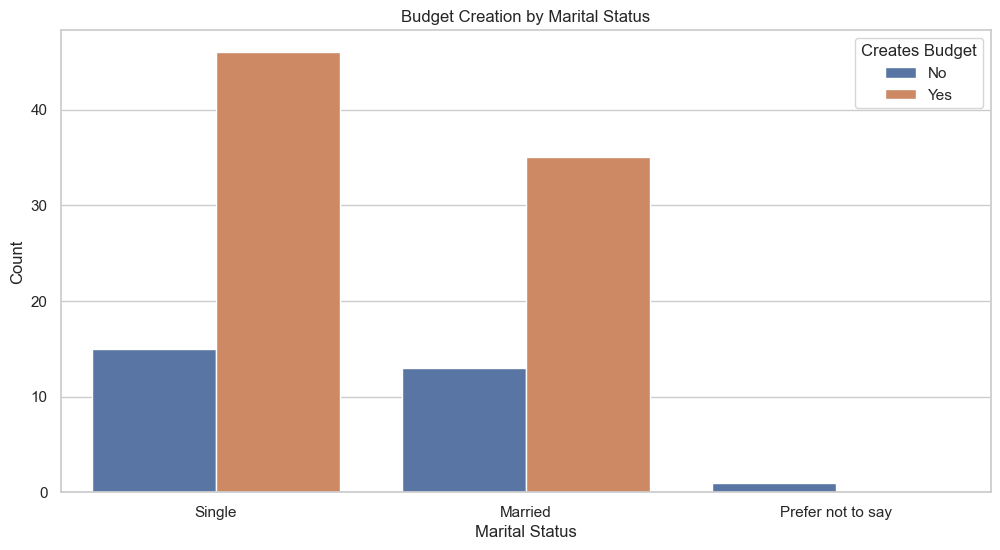

In [40]:
# Bar plot of 'Creates Budget' by 'Marital Status'
plt.figure(figsize=(12, 6))
sns.countplot(x='Marital Status', hue='Creates Budget', data=Save_As_You_Spend_Newdf)
plt.title('Budget Creation by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Creates Budget')
plt.show()

This visualization presents the number of individuals who create a budget, segmented by marital status. Married individuals tend to create a budget more often than single individuals or those who prefer not to say. This may suggest marital status influences budgeting behavior, possibly due to the financial complexities that come with partnership.



CONCLUSION TIPS


Age appears to be a factor in how much individuals save, with some age groups showing a higher propensity to save regularly.
Educational background seems to influence the spread and median percentage of income saved, with higher education correlating to a broader range of savings behaviors.
Marital status may impact the likelihood of creating a budget, with married individuals being more inclined to do so.
Overall, these visualizations suggest there are indeed variations in savings culture across different demographics, and these differences could significantly impact overall savings behavior. For example, younger individuals or those with higher education might be saving at different rates or in different ways compared to other groups, and married individuals might be more proactive in creating budgets. Understanding these patterns can be crucial for developing targeted financial advice, planning, and policy-making.


# Analysis on Question Three

How can machine learning techniques analyze individual spending patterns and financial goals to recommend personalized savings strategies that align with users' unique circumstances??

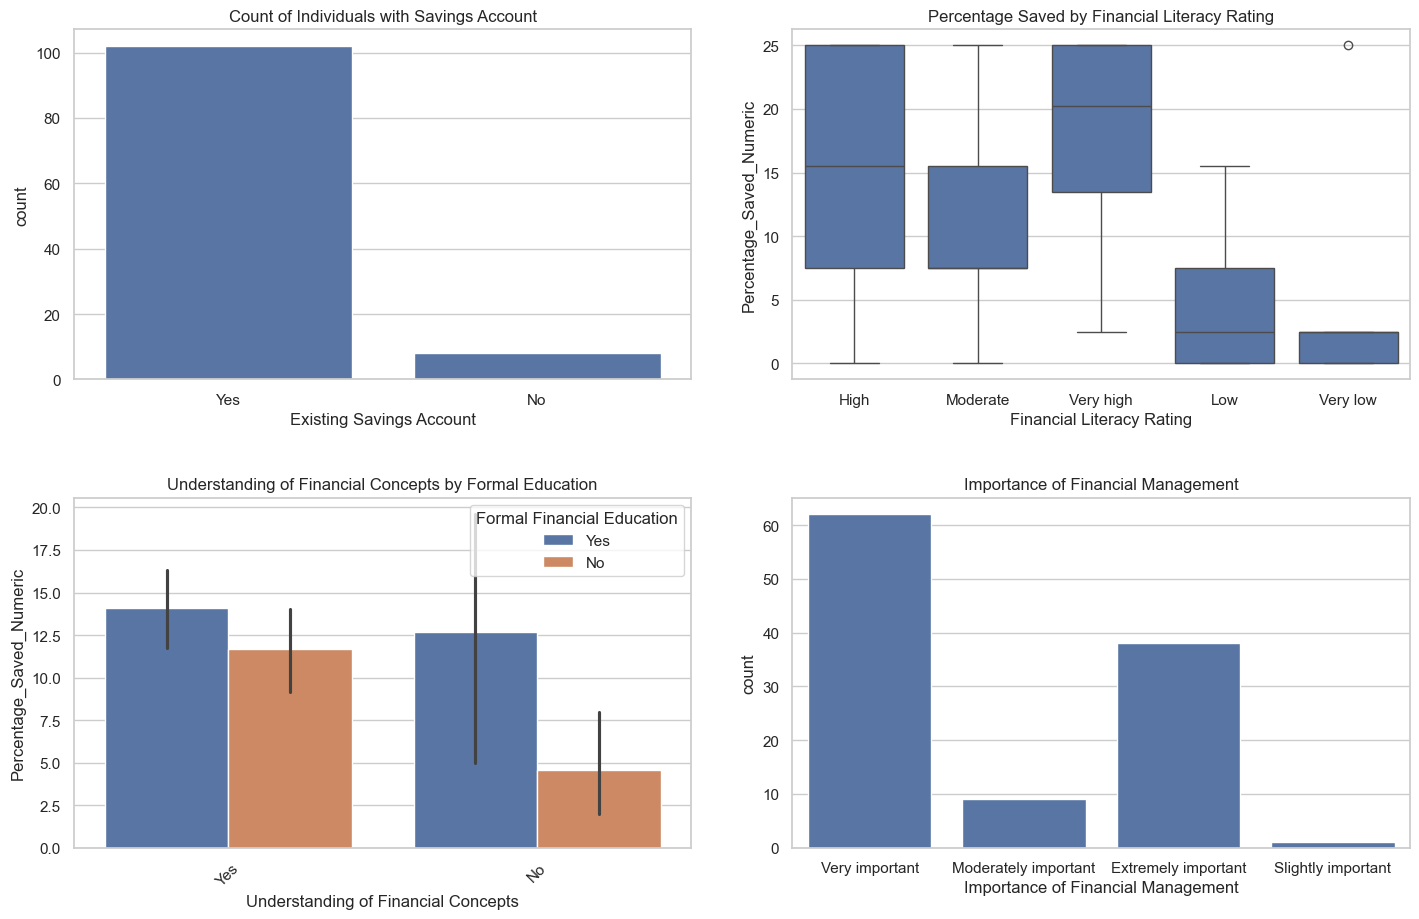

In [41]:

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)

# Countplot of 'Existing Savings Account'
sns.countplot(ax=axes[0, 0], x='Existing Savings Account', data=Save_As_You_Spend_Newdf)
axes[0, 0].set_title('Count of Individuals with Savings Account')


# Boxplot of 'Percentage Saved Numeric' by 'Financial Literacy Rating'
sns.boxplot(ax=axes[0, 1], x='Financial Literacy Rating', y='Percentage_Saved_Numeric', data=Save_As_You_Spend_Newdf)
axes[0, 1].set_title('Percentage Saved by Financial Literacy Rating')

# Barplot of 'Understanding of Financial Concepts' by 'Percentage Saved Numeric'
sns.barplot(ax=axes[1, 0], x='Understanding of Financial Concepts', y='Percentage_Saved_Numeric', hue='Formal Financial Education', data=Save_As_You_Spend_Newdf)
axes[1, 0].set_title('Understanding of Financial Concepts by Formal Education')
axes[1, 0].tick_params(axis='x', rotation=45)

# Countplot of 'Importance of Financial Management'
sns.countplot(ax=axes[1, 1], x='Importance of Financial Management', data=Save_As_You_Spend_Newdf)
axes[1, 1].set_title('Importance of Financial Management')

# Adjust layout spacing
fig.tight_layout(pad=3.0)



plt.show()




# Insights from the above plots

Count of Individuals with Savings Account: The first plot shows a significant majority of individuals have a savings account. Machine learning models can use this information to categorize users into those who already have savings accounts and may be looking to optimize savings versus those who may need basic advice on starting to save.


Percentage Saved by Financial Literacy Rating: The second plot indicates that individuals with higher financial literacy ratings tend to save a higher percentage of their income. This suggests that increasing financial literacy might be a key strategy for improving savings rates, which could be part of personalized recommendations.

Understanding of Financial Concepts by Formal Education: The third plot demonstrates that those with formal financial education, regardless of their self-assessed understanding of financial concepts, tend to save a higher percentage of their income. This reinforces the idea that education impacts savings behavior, and machine learning could use this to target educational interventions.

Importance of Financial Management: The fourth plot shows that most people believe financial management is very important, yet there's a variety in how much they actually save. Machine learning models could identify the discrepancy between the importance placed on financial management and actual savings behavior, indicating opportunities for personalized advice.

# Analysis on Question Four

What machine learning models can accurately predict the long-term impact of various saving strategies on individuals' financial health, considering factors such as income fluctuations and life events? (Optional)

In [42]:
Save_As_You_Spend_Newdf.head()

,Age,Gender,Educational Background,Ethnicity,Marital Status,Country of Residence,Regularly Sets Aside Money,Creates Budget,Currently Investing,App or Tool Usage,...,Existing Savings Account,Annual Income,Percentage Saved,Understanding of Financial Concepts,Financial Literacy Rating,Formal Financial Education,Importance of Financial Management,Awareness of Financial Apps,Mobile/Web-Based Finance Usage,Percentage_Saved_Numeric
0,25-34,Male,Master's degree or higher,"Black, Black British, Caribbean or African",Single,United Kingdom (UK),Yes,No,Yes,Yes,...,Yes,"£10,000 - £20,000",11% - 20%,Yes,High,Yes,Very important,Yes,No,15.5
1,25-34,Female,Bachelor's degree,"Black, Black British, Caribbean or African",Single,Nigeria,Yes,Yes,No,Yes,...,Yes,"£30,001 - £40,000",11% - 20%,Yes,Moderate,Yes,Very important,Yes,No,15.5
2,18-24,Male,Master's degree or higher,Other (please specify),Married,United Kingdom (UK),Yes,Yes,Yes,Yes,...,Yes,"Over £50,000",11% - 20%,Yes,Moderate,Yes,Moderately important,Yes,Yes,15.5
3,25-34,Female,Master's degree or higher,"Black, Black British, Caribbean or African",Single,United Kingdom (UK),Yes,Yes,No,No,...,Yes,"Less than £10,000",5% - 10%,Yes,Moderate,No,Very important,No,No,7.5
4,25-34,Male,Bachelor's degree,"Black, Black British, Caribbean or African",Married,United Kingdom (UK),Yes,No,No,No,...,No,"£10,000 - £20,000",More than 20%,Yes,High,No,Moderately important,Yes,No,25.0


# MACHINE LEARNING

# Data Preprocessing 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [46]:
# Encode categorical variables
label_encoders = {}
for column in Save_As_You_Spend_Newdf.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    Save_As_You_Spend_Newdf[column] = label_encoders[column].fit_transform(Save_As_You_Spend_Newdf[column])

In [47]:
# Split the data into training and testing sets
X = Save_As_You_Spend_Newdf.drop(columns=['Percentage_Saved_Numeric', 'Percentage Saved'])
y = Save_As_You_Spend_Newdf['Percentage Saved']


# TRAINING AND TESTING

In [49]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [50]:



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary with the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

# Dictionary to hold accuracy scores
accuracy_scores = {}

# Loop through models, train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_scores[name] = accuracy  # Store the accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Identify the model with the highest accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nBest performing model: {best_model} with accuracy of {accuracy_scores[best_model]:.4f}")


Logistic Regression Accuracy: 0.2273
Random Forest Accuracy: 0.4545
SVM Accuracy: 0.1364
KNN Accuracy: 0.1818

Best performing model: Random Forest with accuracy of 0.4545


The best performing model, a Random Forest, has an accuracy of only 0.4545. Given the low accuracy and the small dataset size (118 rows) from the survey, here are some limitations to consider when using machine learning in this scenario:

1. Overfitting Risk: With such a small dataset, there is a significant risk that the machine learning model might overfit. Overfitting occurs when a model learns the training data too well, including its noise and outliers, which makes it perform poorly on unseen data. The true predictive power of the model could be much lower than suggested by the accuracy score obtained during training.

2. Insufficient Generalization: With only 118 rows, the model may not have enough data to capture the complexity of the underlying pattern it is trying to learn. This can lead to poor generalization to new, unseen data, as the nuances and variability of the broader population may not be well-represented.

3. Biased Representations: If the survey data is not representative of the larger population, any conclusions or predictions made by the machine learning model will be biased towards the surveyed group. This lack of representativeness can severely limit the applicability of the model to only the specific conditions similar to those of the survey.

4. Limited Feature Learning: The low accuracy might be an indication that the features extracted from the small dataset are not powerful enough to make accurate predictions. The model may need more data to identify and learn from the important features that influence the output.

5. Underperforming Model Selection: The low accuracy could also point to an inappropriate model choice for the given data. It may be that other models or a combination of models (ensemble methods) could perform better, but the small dataset size might not be sufficient to properly train more complex models.

6. Challenge in Model Evaluation: With a small dataset, there is a limited ability to divide the data into training and testing sets without losing valuable information. This can make it difficult to properly evaluate the model's performance and to conduct meaningful cross-validation.

7. Practicality and Cost-effectiveness: Deploying a machine learning model with low accuracy could be impractical and not cost-effective, especially if critical decisions are to be based on its predictions. The consequences of incorrect predictions need to be considered, particularly in high-stakes scenarios.

To mitigate these limitations, it is generally recommended to collect more data to improve model training, consider feature engineering to extract more informative attributes, explore model tuning to optimize performance, and possibly look into data augmentation techniques to artificially increase the size of the dataset.